In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path().absolute().parent))

print(Path().absolute().parent)

/home/intern1/CT_to_MRI_scratch


In [2]:
import glob

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import torch.nn.functional as F
from params import config
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr


In [7]:
log_v = 'log_2025_07_28_clip_sbflow_baseline_256_256'
run_idx = 0
run_ep = 10
log_root = Path(f"../log/{log_v}/{run_idx:05d}_train/test/ep_{run_ep}")
res_files = glob.glob(str(log_root) + '/*.mat')
print(len(res_files))

512


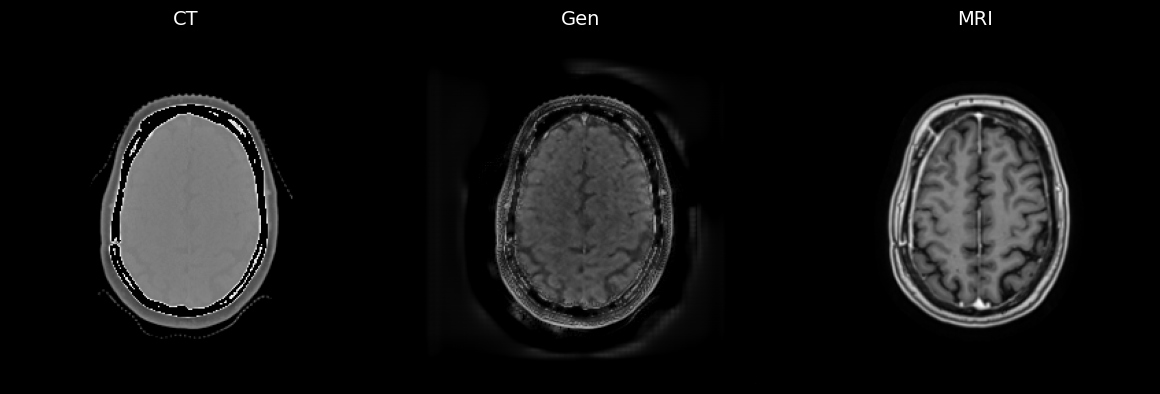

SSIM (Gen vs MRI): 0.2320
PSNR (Gen vs MRI): 14.62 dB


In [9]:
vmax, vmin = 1, 0
idx = 130

res_mat = loadmat(res_files[idx])
cond = np.array(res_mat['cond']).squeeze()
out = np.array(res_mat['out']).squeeze()
img = np.array(res_mat['img']).squeeze()
mask = np.array(res_mat['mask']).squeeze() if 'mask' in res_mat else None


fig = plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.05, hspace=0)
fig.patch.set_facecolor('black')

titles = ["CT", "Gen", "MRI"]
images = [cond, out, img]

for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    ax.imshow(images[i], cmap='gray', vmin=vmin, vmax=vmax)
    ax.set_title(titles[i], fontsize=14, color='white')
    ax.axis('off')

plt.tight_layout()
plt.show()

ssim_val = ssim(im1 = out, im2 = img, data_range=1.0, mask = mask)
if mask is not None:
    mask = (mask > 0)
    psnr_val = psnr(image_test= out[mask], image_true = img[mask], data_range=1.0)
else:
    psnr_val = psnr(out, img, data_range=1.0)

print(f"SSIM (Gen vs MRI): {ssim_val:.4f}")
print(f"PSNR (Gen vs MRI): {psnr_val:.2f} dB")

